BismiLlaah!

In [42]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels as sm
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
from scipy.stats import chi2_contingency
from statsmodels.stats.multicomp import pairwise_tukeyhsd

import warnings
warnings.filterwarnings('ignore')

In [43]:
d1 = pd.read_csv('ca_ssi_adult_odp_2021.csv')
d2 = pd.read_csv('ca_ssi_adult_odp_2022.csv')
d3 = pd.read_csv('ca_ssi_adult_odp_2023.csv')

In [44]:
#
assert (d1.columns == d2.columns).all()
print("Columns match between 2021 and 2022 datasets.")

assert (d1.columns == d3.columns).all()
print("Columns match between 2021 and 2023 datasets.")

assert (d2.columns == d3.columns).all()
print("Columns match between 2022 and 2023 datasets.")

Columns match between 2021 and 2022 datasets.
Columns match between 2021 and 2023 datasets.
Columns match between 2022 and 2023 datasets.


In [45]:
data = pd.concat([d1, d2, d3], ignore_index=True)
d1.head()

,Year,State,County,HAI,Operative_Procedure,Facility_ID,Facility_Name,Hospital_Category_RiskAdjustment,Facility_Type,Procedure_Count,Infections_Reported,Infections_Predicted,SIR,SIR_CI_95_Lower_Limit,SIR_CI_95_Upper_Limit,Comparison,Met_2020_Goal,SIR_2015
0,2021,California,Sacramento,Surgical Site Infections (SSI),Appendix surgery,30000037,Methodist Hospital of Sacramento,Acute Care Hospital,"Community, 125-250 Beds",82,0,0.16,NaN,NaN,NaN,NaN,NaN,0.00
1,2021,California,Sacramento,Surgical Site Infections (SSI),"Bile duct, liver or pancreatic surgery",30000037,Methodist Hospital of Sacramento,Acute Care Hospital,"Community, 125-250 Beds",6,0,0.05,NaN,NaN,NaN,NaN,NaN,NaN
2,2021,California,Sacramento,Surgical Site Infections (SSI),Cesarean section,30000037,Methodist Hospital of Sacramento,Acute Care Hospital,"Community, 125-250 Beds",256,0,0.25,0.0,0.0,14.82,Same,Yes,0.00
3,2021,California,Sacramento,Surgical Site Infections (SSI),Colon surgery,30000037,Methodist Hospital of Sacramento,Acute Care Hospital,"Community, 125-250 Beds",36,0,0.70,0.0,0.0,5.25,Same,Yes,1.11
4,2021,California,Sacramento,Surgical Site Infections (SSI),Exploratory abdominal surgery (laparotomy),30000037,Methodist Hospital of Sacramento,Acute Care Hospital,"Community, 125-250 Beds",99,0,0.31,0.0,0.0,11.82,Same,Yes,0.00


In [46]:
data.columns = data.columns.str.strip()

In [47]:
data.shape

(18269, 18)

In [48]:
data.drop_duplicates(inplace=True)
data.shape

(18269, 18)

In [49]:
nums = data.select_dtypes(include=['int64', 'float64'])
numerics = nums.drop(['Year', 'Facility_ID'], axis=1)  # Exclude 'Year' and 'Facility_ID' as they are not numerical features for analysis
numerics.describe()

,Procedure_Count,Infections_Reported,Infections_Predicted,SIR,SIR_CI_95_Lower_Limit,SIR_CI_95_Upper_Limit,SIR_2015
count,18269.000000,18269.000000,18269.000000,9271.000000,9271.000000,9271.000000,9024.000000
mean,104.198533,0.594997,0.712038,0.845676,0.132219,7.824364,0.975423
std,171.978170,1.572954,1.469779,1.368309,0.301428,5.566898,1.463845
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.160000,0.000000
25%,10.000000,0.000000,0.050000,0.000000,0.000000,3.270000,0.000000
50%,43.000000,0.000000,0.210000,0.000000,0.000000,6.390000,0.000000
75%,128.000000,1.000000,0.750000,1.290000,0.090000,11.280000,1.520000
max,2590.000000,29.000000,21.960000,17.860000,5.800000,42.980000,10.870000


In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18269 entries, 0 to 18268
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Year                              18269 non-null  int64  
 1   State                             18269 non-null  object 
 2   County                            18269 non-null  object 
 3   HAI                               18269 non-null  object 
 4   Operative_Procedure               18269 non-null  object 
 5   Facility_ID                       18269 non-null  int64  
 6   Facility_Name                     18269 non-null  object 
 7   Hospital_Category_RiskAdjustment  18269 non-null  object 
 8   Facility_Type                     18269 non-null  object 
 9   Procedure_Count                   18269 non-null  int64  
 10  Infections_Reported               18269 non-null  int64  
 11  Infections_Predicted              18269 non-null  float64
 12  SIR 

In [51]:
data.isnull().sum()

Year                                   0
State                                  0
County                                 0
HAI                                    0
Operative_Procedure                    0
Facility_ID                            0
Facility_Name                          0
Hospital_Category_RiskAdjustment       0
Facility_Type                          0
Procedure_Count                        0
Infections_Reported                    0
Infections_Predicted                   0
SIR                                 8998
SIR_CI_95_Lower_Limit               8998
SIR_CI_95_Upper_Limit               8998
Comparison                          8998
Met_2020_Goal                       8998
SIR_2015                            9245
dtype: int64

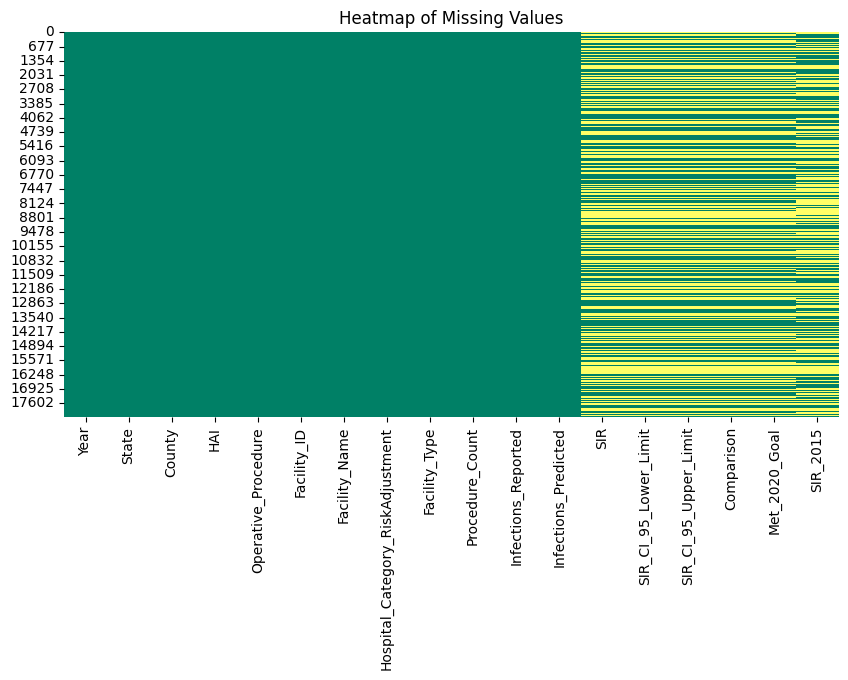

In [52]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.heatmap(data.isnull(), cbar=False, cmap='summer', ax=ax)
plt.title('Heatmap of Missing Values')
plt.show()
# download image as png
#plt.savefig('Missing Values Heatmap.png', bbox_inches='tight', dpi=300)

In [53]:
numerics.corr()

,Procedure_Count,Infections_Reported,Infections_Predicted,SIR,SIR_CI_95_Lower_Limit,SIR_CI_95_Upper_Limit,SIR_2015
Procedure_Count,1.000000,0.442025,0.553803,0.017693,0.167661,-0.391403,0.002212
Infections_Reported,0.442025,1.000000,0.746992,0.435112,0.715134,-0.194879,0.038442
Infections_Predicted,0.553803,0.746992,1.000000,-0.003477,0.246513,-0.498792,0.015719
SIR,0.017693,0.435112,-0.003477,1.000000,0.729468,0.423226,0.048073
SIR_CI_95_Lower_Limit,0.167661,0.715134,0.246513,0.729468,1.000000,0.085630,0.042890
SIR_CI_95_Upper_Limit,-0.391403,-0.194879,-0.498792,0.423226,0.085630,1.000000,0.012743
SIR_2015,0.002212,0.038442,0.015719,0.048073,0.042890,0.012743,1.000000


<Axes: >

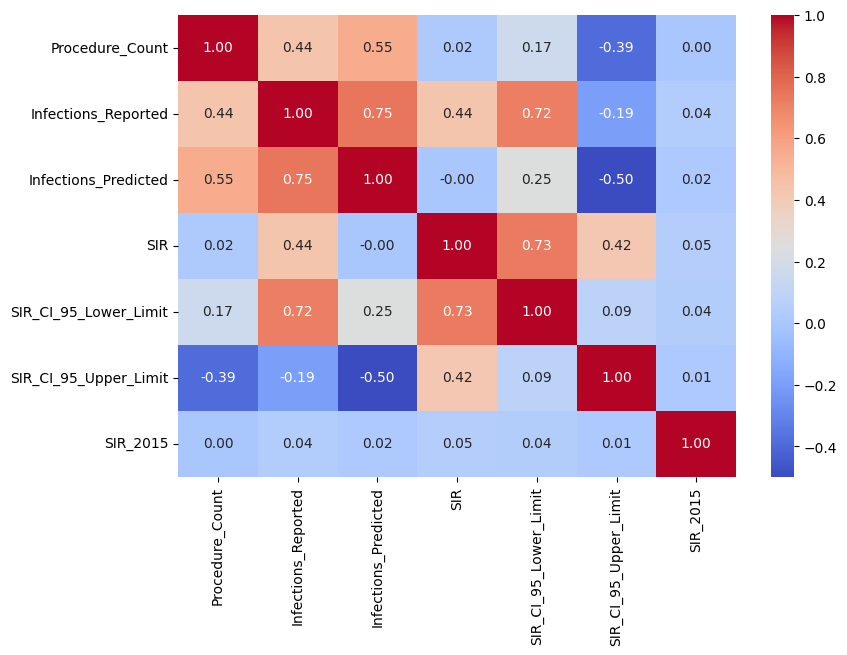

In [54]:
fig, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(numerics.corr(), annot=True, cmap='coolwarm', fmt='.2f', ax=ax)

In [55]:
"""sns.pairplot(numerics, diag_kind='kde', markers='o', plot_kws={'alpha': 0.5})
plt.tight_layout()
plt.show()"""

"sns.pairplot(numerics, diag_kind='kde', markers='o', plot_kws={'alpha': 0.5})\nplt.tight_layout()\nplt.show()"

#### Data Cleaning

According to the data Dictionary, the Standardized Infection Ratio (SIR) is a summary measure used to track SSIs over time by dividing the number of `Infections_Reported` by `Infections_Predicted`, provided `Infections_Predicted` ***<1 and >=0.2*** (California Department of Public Health)

We will use this information to fill in missing observations for the `SIR` column, using the Median. Also, the choice of using the grouped Median for filling for missing observations is because the Median is most suitable (especially) in instances where the SIR values are skewed due to few hospitals having very high or very low infection rates. The median is not affected by these extremes, whereas the Mean can be highly susceptible to outliers. Also, since clinical and infection-related data often have right-skewed distributions i.e many facilities have low SIRs and a few have very high ones (like applicable to our dataset), the Median captures the "typical" value better than the Mean in these cases.

In [56]:
# create a mask for the Predicted Infections range
sir_mask = (data['Infections_Predicted'] >= 0.2) & (data['Infections_Predicted'] < 1) & (data['SIR'].isnull())

# Calculate SIR
data.loc[sir_mask, 'SIR'] = (data.loc[sir_mask, 'Infections_Reported'] / data.loc[sir_mask, 'Infections_Predicted'])

# Impute SIR groupwise for valid predictions
data['SIR'] = data.groupby(['HAI', 'Operative_Procedure'])['SIR'].transform(lambda x: x.fillna(x.median()))

In [57]:
# Fill missing values for SIR_CI_95_Lower_Limit and SIR_CI_95_Upper_Limit using median of each group

for col in ['SIR_CI_95_Lower_Limit', 'SIR_CI_95_Upper_Limit']:
    data[col] = data.groupby(['HAI', 'Operative_Procedure'])[col].transform(lambda x: x.fillna(x.median()))

Next, we determine the `Comparison` column based on the Confidence Interval (CI) limits. 
If CI includes 1 == "Same", if CI lower > 1 == "Worse", if CI upper < 1 == "Better"

In [58]:
data.Comparison.value_counts()

Comparison
Same      8897
Worse      230
Better     144
Name: count, dtype: int64

In [59]:
def determine_comparison(row):
    if pd.isnull(row['SIR_CI_95_Lower_Limit']) or pd.isnull(row['SIR_CI_95_Upper_Limit']):
        return np.nan
    elif row['SIR_CI_95_Lower_Limit'] > 1:
        return "Worse"
    elif row['SIR_CI_95_Upper_Limit'] < 1:
        return "Better"
    else:
        return "Same"

data['Comparison'] = data['Comparison'].fillna(data.apply(determine_comparison, axis=1))

In [60]:
# defining a function to  Met_2020_Goal
def met_2020_goal(row):
    if pd.isna(row['SIR']) or row['Year'] < 2021:
        return np.nan
    return "Yes" if row['SIR'] < 0.70 else "No"

data['Met_2020_Goal'] = data['Met_2020_Goal'].fillna(data.apply(met_2020_goal, axis=1))

According to the national baseline data, hospitals with predicted number of SSI being 0.2 will not have an SIR calculated by NHSN or CDPH. Hence, we will only factor health facilities with SSI values greater than 0.2

In [61]:
# Filling the missing ovservation using the median value
data['SIR_2015'] = data['SIR_2015'].fillna(data['SIR_2015'].median())

In [62]:
data.isnull().sum()

Year                                0
State                               0
County                              0
HAI                                 0
Operative_Procedure                 0
Facility_ID                         0
Facility_Name                       0
Hospital_Category_RiskAdjustment    0
Facility_Type                       0
Procedure_Count                     0
Infections_Reported                 0
Infections_Predicted                0
SIR                                 0
SIR_CI_95_Lower_Limit               0
SIR_CI_95_Upper_Limit               0
Comparison                          0
Met_2020_Goal                       0
SIR_2015                            0
dtype: int64

<Axes: >

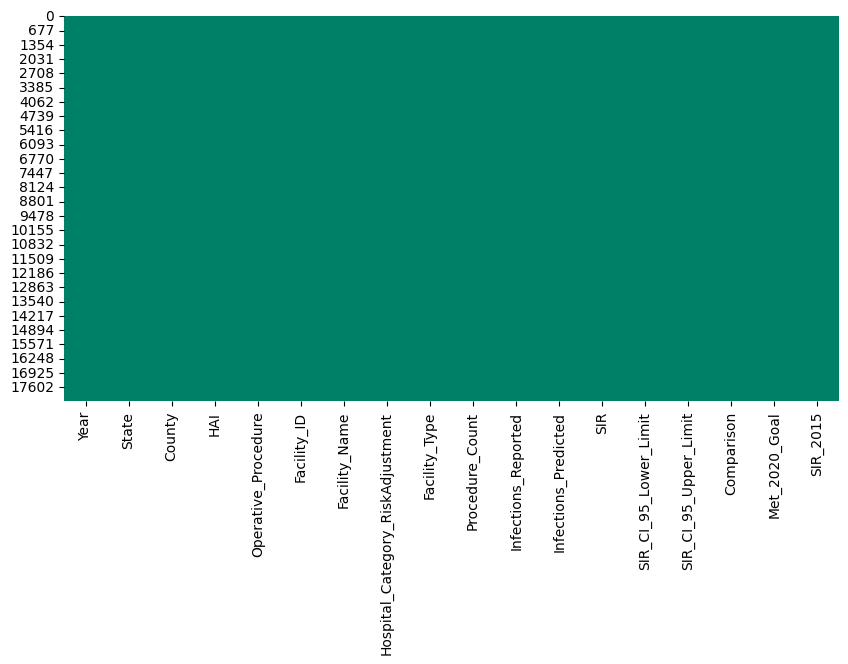

In [63]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.heatmap(data.isnull(), cbar=False, cmap='summer')

In [64]:
data.drop(['State', 'Facility_ID', 'HAI'], axis=1, inplace=True)
data.shape

(18269, 15)

#### Data Analysis

Inspecting the Reported and Predicted SSI values across the Counties

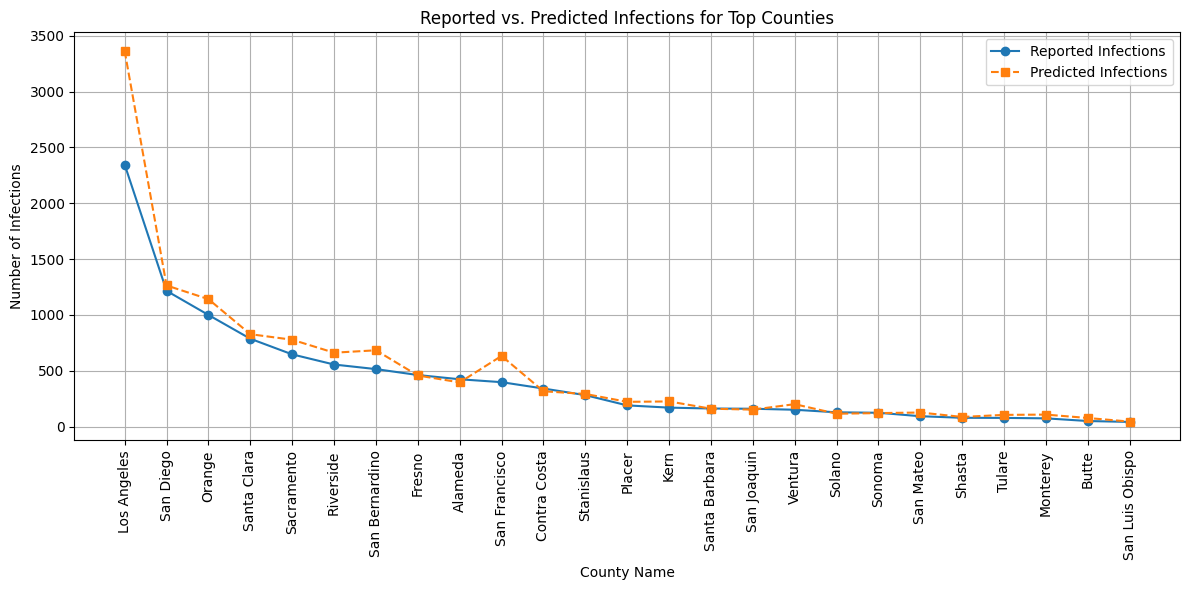

In [65]:
county_sum = data.groupby('County')[['Infections_Reported', 'Infections_Predicted']].sum()
counties_reported = county_sum.sort_values(by='Infections_Reported', ascending=False).head(25)

tpr = pd.DataFrame(counties_reported)
tpr.reset_index(inplace=True)

plt.figure(figsize=(12, 6))
counties = tpr['County']
plt.plot(counties, tpr['Infections_Reported'], label='Reported Infections', linestyle='-', marker='o')
plt.plot(counties, tpr['Infections_Predicted'], label='Predicted Infections', linestyle='--', marker='s')

plt.title('Reported vs. Predicted Infections for Top Counties')
plt.xlabel('County Name')
plt.ylabel('Number of Infections')
plt.legend()
plt.grid(True)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Inspecting `SIR` for different `Operative_Procedures.`

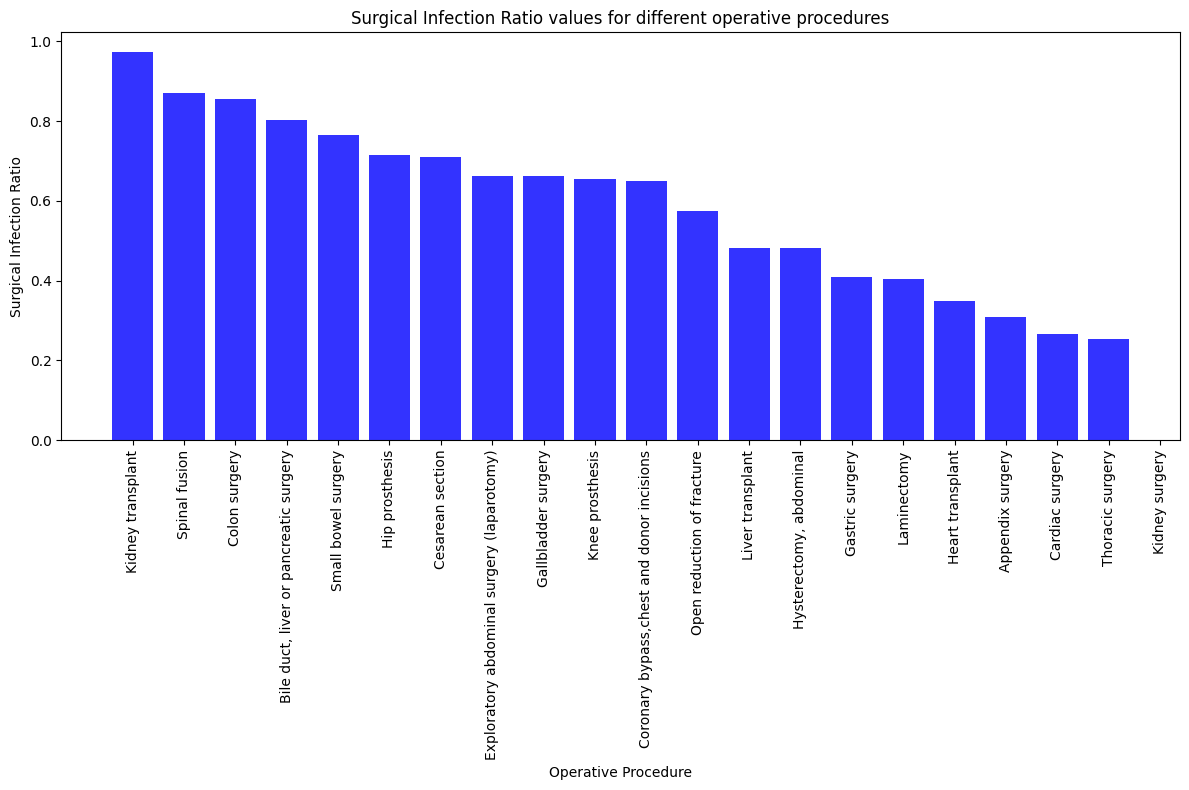

In [66]:
sir_op = data.groupby('Operative_Procedure')['SIR'].mean().sort_values(ascending=False)
sir_op_df = pd.DataFrame(sir_op)
sir_op_mask = pd.DataFrame(sir_op_df [(sir_op_df < 1) & (sir_op_df > 0.2) ])
sir_op = sir_op_mask.reset_index()


plt.figure(figsize=(12, 8))
counties = sir_op['Operative_Procedure']
plt.bar(counties, sir_op['SIR'], label='Surgical Infection Ratio', color='b', alpha=.8)
plt.title('Surgical Infection Ratio values for different operative procedures')
plt.xlabel('Operative Procedure')
plt.ylabel('Surgical Infection Ratio')

plt.xticks(rotation=90)

plt.tight_layout()
plt.savefig('SIR by Operative Procedure.png', bbox_inches='tight', dpi=300)

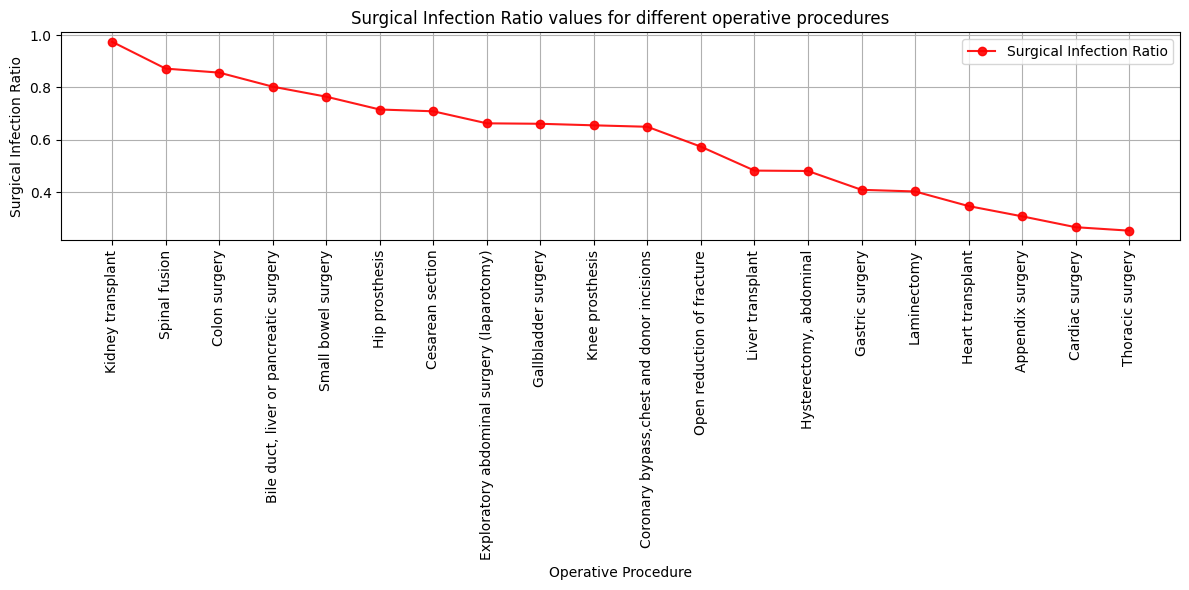

<Figure size 640x480 with 0 Axes>

In [ ]:
sir_op = data.groupby('Operative_Procedure')['SIR'].mean().sort_values(ascending=False)
sir_op_df = pd.DataFrame(sir_op)
sir_op_mask = pd.DataFrame(sir_op_df [(sir_op_df < 1) & (sir_op_df > 0.2) ])
sir_op = sir_op_mask.reset_index()


plt.figure(figsize=(10, 5))
counties = sir_op['Operative_Procedure']
plt.plot(counties, sir_op['SIR'], label='Surgical Infection Ratio', linestyle='-', marker='o', color='r', alpha=.9)
plt.title('Surgical Infection Ratio values for different operative procedures')
plt.xlabel('Operative Procedure')
plt.ylabel('Surgical Infection Ratio')
plt.legend()
plt.grid(True)

plt.xticks(rotation=90)

plt.tight_layout()
plt.show()
plt.savefig('SIR by Operative Procedure Line Plot.png', bbox_inches='tight', dpi=300)

Exploring `SIR` by `Hospital Category` 

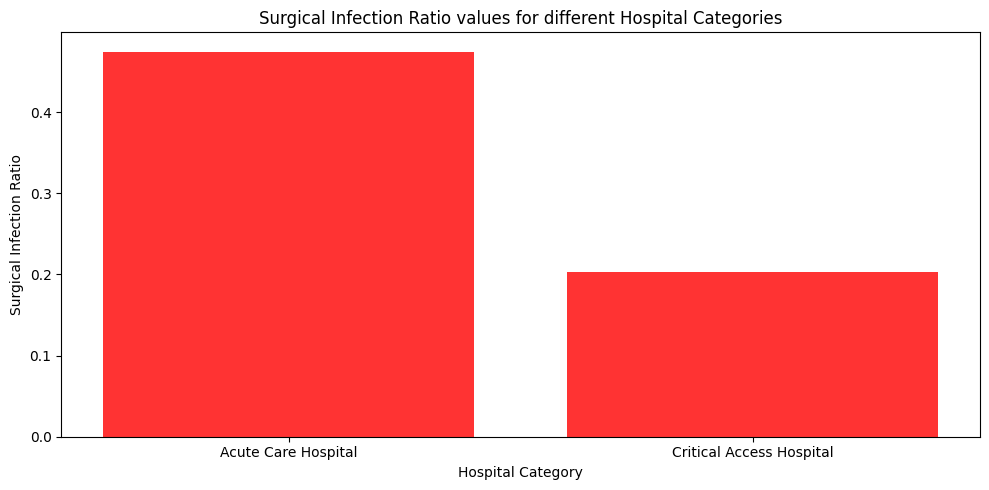

<Figure size 640x480 with 0 Axes>

In [ ]:
sir_hc = data.groupby('Hospital_Category_RiskAdjustment')['SIR'].mean().sort_values(ascending=False)
sir_hc_df = pd.DataFrame(sir_hc)
sir_hc_mask = pd.DataFrame(sir_hc_df)
sir_hc = sir_hc_mask.reset_index()

plt.figure(figsize=(10, 5))
counties = sir_hc['Hospital_Category_RiskAdjustment']
plt.bar(counties, sir_hc['SIR'], label='Surgical Infection Ratio', color='r', alpha=.8)
plt.title('Surgical Infection Ratio values for different Hospital Categories')
plt.xlabel('Hospital Category')
plt.ylabel('Surgical Infection Ratio')

plt.tight_layout()
plt.show()
plt.savefig('SIR by Hospital Category.png', bbox_inches='tight', dpi=300)

##### Hypothesis Testing

Using T-test for Test Independence to compare average infection ratios (SIR) across hospital groups

In [69]:
H0 = "There is no statistically significant difference in average SIR among the different Hospital Groups"
H1 = "There is a statistically significant difference in average SIR among Hospital Groups"

alpha = 0.05 # Given significance level
# Hypothesis Testing: Compare SIR between Teaching and Community hospitals
teaching = data[data['Facility_Type'].str.contains("Teaching", na=False)]["SIR"].dropna()
community = data[data["Facility_Type"].str.contains("Community", na=False)]["SIR"].dropna()
t_stat, p_val = ttest_ind(teaching, community)
print(f"T-statistic: {t_stat}, P-value: {p_val}")


T-statistic: 10.66287289989215, P-value: 1.8342760128114164e-26


Since the P-Value (1.83) is greater than the alpha value (0.05), we fail to reject the null hypothesis and conclude that there is no statistically significant difference in mean Infection Rates (SIR) among the different Hospital's bed size

##### Using T-test for Test Independence to compare the mean infection ratios (SIR) between hostiptal's bed size

In [70]:
H0 = "There is no statistically significant difference in avarega SIR between large and small-bed hospitals"
H1 = "There is a statistically significant difference in average SIR between large and small hospitals"

alpha = 0.05 # Given significance level

# Define bed size categories from Facility_Type
def bed_size_category(facility_type):
    if pd.isna(facility_type):
        return None
    elif '>250 Beds' in facility_type:
        return 'Large'
    elif '<125 Beds' in facility_type or '125-250 Beds' in facility_type:
        return 'Small'
    else:
        return None  # Exclude unclassified types like LTAC or Pediatric

data["Bed_Size_Category"] = data["Facility_Type"].apply(bed_size_category)

# Filter valid rows and drop missing SIR
large_hospitals = data[data["Bed_Size_Category"] == "Large"]["SIR"].dropna()
small_hospitals = data[data["Bed_Size_Category"] == "Small"]["SIR"].dropna()

# Run t-test
t_stat, p_val = ttest_ind(large_hospitals, small_hospitals, equal_var=False)

# Print results with alpha interpretation
print(f"T-statistic: {t_stat:.4f}, p-value: {p_val:.4f}")

T-statistic: 6.9763, p-value: 0.0000


Since the p-value (0.00) is smaller than the alpha value (0.05), we reject the null hypothesis and conclude that there is a statistically significant difference in SIR between large and small-bed hospitals in California. Exploring more with the Post-Hoc test...

In [71]:
# Run Tukey’s test

# Filter out missing SIR or Operative_Procedure
subset = data[["Facility_Type", "SIR"]].dropna()

tukey = pairwise_tukeyhsd(
    endog=subset["SIR"],
    groups=subset["Facility_Type"],
    alpha=0.05
)

print(tukey.summary())


                Multiple Comparison of Means - Tukey HSD, FWER=0.05                
         group1                group2        meandiff p-adj   lower   upper  reject
-----------------------------------------------------------------------------------
Community, 125-250 Beds Community, <125 Beds  -0.1248    0.0 -0.1964 -0.0532   True
Community, 125-250 Beds Community, >250 Beds   0.0986 0.0023   0.024  0.1732   True
Community, 125-250 Beds      Critical Access  -0.2173    0.0 -0.3483 -0.0863   True
Community, 125-250 Beds       Major Teaching   0.1622    0.0  0.1009  0.2236   True
Community, 125-250 Beds            Pediatric  -0.2554 0.0004 -0.4287 -0.0821   True
   Community, <125 Beds Community, >250 Beds   0.2234    0.0  0.1482  0.2986   True
   Community, <125 Beds      Critical Access  -0.0925 0.3377 -0.2239  0.0388  False
   Community, <125 Beds       Major Teaching    0.287    0.0   0.225   0.349   True
   Community, <125 Beds            Pediatric  -0.1306 0.2643 -0.3041  0.0429

The Tukey HSD post-hoc test reveals that many hospital types differ significantly in their SIR, especially between Major Teaching and Community hospitals, and between Pediatric and Community hospitals, as shown by reject = True. However, some pairs like Community <125 Beds vs Critical Access or Pediatric did not show significant differences (reject = False), meaning their SIRs are statistically similar.

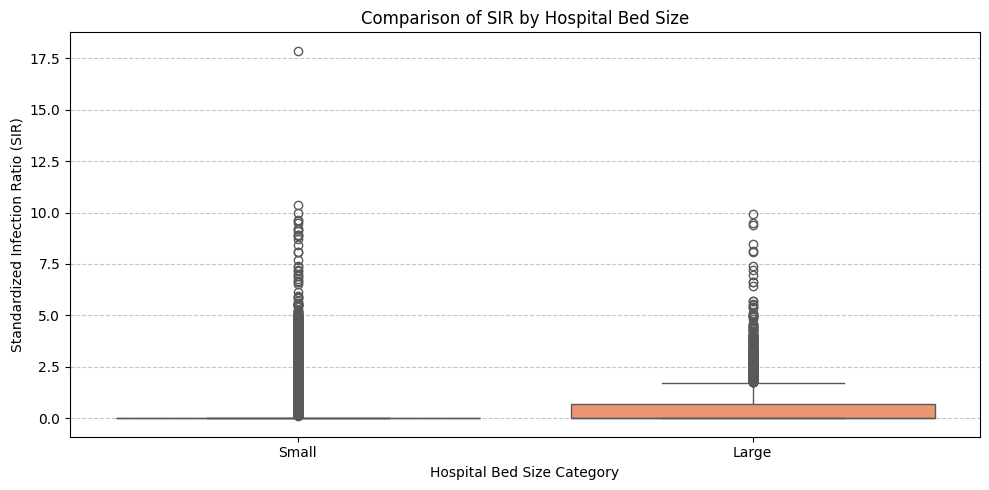

In [72]:
# Filter the relevant data
plot_data = data[["Bed_Size_Category", "SIR"]].dropna()

# Plot
plt.figure(figsize=(10, 5))
sns.boxplot(data=plot_data, x="Bed_Size_Category", y="SIR", palette="Set2")
plt.title("Comparison of SIR by Hospital Bed Size")
plt.xlabel("Hospital Bed Size Category")
plt.ylabel("Standardized Infection Ratio (SIR)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('SIR by Hospital Bed Size.png', bbox_inches='tight', dpi=300)


##### Using One-way ANOVA to compare Mean Infection Ratio (SIR) across the years

In [73]:
H0 = "There is no statically significant difference in average SIR across the years"
H1 = "There is a statistically significant difference in average SIR across the years"

alpha = 0.05 # Given significance level


sir_2021 = data[data["Year"] == 2021]["SIR"].dropna()
sir_2022 = data[data["Year"] == 2022]["SIR"].dropna()
sir_2023 = data[data["Year"] == 2023]["SIR"].dropna()

f_stat, p_val = f_oneway(sir_2021, sir_2022, sir_2023)

print(f"F-statistic: {f_stat:.4f}, p-value: {p_val:.4f}")

F-statistic: 2.3067, p-value: 0.0996


Also, since the p-value (0.09) is greater than the alpha value (0.05), we fail to reject the null hypothesis and conclude that there is no statistically significant difference in mean SIR across the years.

##### Comparing Mean Infection Ratio (SIR) among Operative Procedures

In [74]:
H0 = "There is no significant difference in mean SIR between the different Operative Procedures"
H1 = "There is a significant difference in mean SIR between the different Operative Procedures"

alpha = 0.05 # Given significance level

# Filter out missing SIR or Operative_Procedure
subset = data[["Operative_Procedure", "SIR"]].dropna()

# Group SIR values by procedure
grouped_sir = subset.groupby("Operative_Procedure")["SIR"].apply(list)

# Only keep procedures with enough data (e.g., ≥10 observations)
filtered_groups = [i for i in grouped_sir if len(i) >= 10]

# Perform ANOVA
f_stat, p_val = f_oneway(*filtered_groups)

print(f"F-statistic: {f_stat:.4f}, p-value: {p_val:.4f}")

# Run Tukey’s test
tukey = pairwise_tukeyhsd(
    endog=subset["SIR"],
    groups=subset["Operative_Procedure"],
    alpha=0.05
)

F-statistic: 50.4273, p-value: 0.0000


Since the p-value (0.00) is less than the alpha value (0.05), we reject the null hypothesis and conclude that there is a statistically significant difference in SIR across the various operative procedures. Exploring further with the post-hoc test, we observe that...

In [75]:
# Run Tukey’s test
tukey = pairwise_tukeyhsd(
    endog=subset["SIR"],
    groups=subset["Operative_Procedure"],
    alpha=0.05
)

print(tukey.summary())

                                    Multiple Comparison of Means - Tukey HSD, FWER=0.05                                     
                  group1                                     group2                   meandiff p-adj   lower   upper  reject
----------------------------------------------------------------------------------------------------------------------------
          Abdominal aortic aneurysm repair                           Appendix surgery   0.3086 0.0141  0.0264  0.5908   True
          Abdominal aortic aneurysm repair     Bile duct, liver or pancreatic surgery   0.8031    0.0  0.5133  1.0929   True
          Abdominal aortic aneurysm repair                            Cardiac surgery   0.2672  0.207 -0.0396  0.5739  False
          Abdominal aortic aneurysm repair                           Cesarean section   0.7092    0.0  0.4164   1.002   True
          Abdominal aortic aneurysm repair                              Colon surgery   0.8567    0.0  0.5742  1.1392   True


From the Tukey HSD post-hoc test, it could be seen that **SIR for “Abdominal aortic aneurysm repair” is significantly higher** than many other procedures (e.g., Appendix, Colon, Cesarean, Hip prosthesis), as indicated by `reject = True` and **p-values < 0.05**. However, for some comparisons (e.g., Cardiac surgery, Vaginal hysterectomy), the differences in SIR are **not statistically significant** (`reject = False`).

##### Using Chi-square of test Independence to test if Meeting the 2020 Goal is dependent on Facility type

In [76]:
H0 = "There is no significant relationship between Facility Type and Goal Met 2020"
H1 = "There is significant relationship between Facility Type and Goal Met 2020"

alpha = 0.05 # Given significance level
contingency = pd.crosstab(data["Facility_Type"], data["Met_2020_Goal"])
chi2, p, dof, expected = chi2_contingency(contingency)

print(f"Chi-square = {chi2:.4f}, p-value = {p:.4f}, Degrees of Freedom = {dof}")

Chi-square = 580.0940, p-value = 0.0000, Degrees of Freedom = 5


Since the p-value (0.00) is less than the alpha value (0.05), we reject the null hypothesis and conclude that there is a statistically significant relationship between the Facility Type and Meeting the 2020 Goal.

##### Using Ordinary Least Squares to predict Infection ratio (SIR) based on predictors

In [77]:
import statsmodels.api as sm

H0 = "There is no significant relationship between Procedure_Count, Infections_Predicted and SIR"
H1 = "There is a significant relationship between Procedure_Count, Infections_Predicted and SIR"

X = data[["Procedure_Count", "Infections_Predicted"]].dropna()
y = data.loc[X.index, "SIR"]
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                    SIR   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     367.9
Date:                Wed, 16 Jul 2025   Prob (F-statistic):          2.29e-157
Time:                        22:38:15   Log-Likelihood:                -26675.
No. Observations:               18269   AIC:                         5.336e+04
Df Residuals:                   18266   BIC:                         5.338e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.3333 

From the OLS Model, it could be seen that `Procedure_Count` and `Infections_Predicted` are statistically significant predictors of `SIR` (since 0.00 < 0.05). However, these predictors explains roughly **3.9% of the variance** in infection rates, indicating a pretty **weak predictive power**. While the relationship is quite statistically signifcant, other factors are also influential in predicting infection ratio (SIR).


In [78]:
import streamlit as st
import pandas as pd
import numpy as np
import google.generativeai as genai

# -----------------------------
# GEMINI CONFIG
# -----------------------------
genai.configure(api_key=st.secrets["GEMINI_API_KEY"])

# Initialize Gemini Model
model = genai.GenerativeModel('gemini-pro')

# -----------------------------
# STREAMLIT APP SETUP
# -----------------------------
st.title("🧼 California Surgical Site Infections Dashboard")

uploaded_file = st.file_uploader("📁 Upload SSI dataset (CSV)", type="csv")

if uploaded_file:
    data = pd.read_csv(uploaded_file)
    st.success("✅ Dataset loaded!")

    # -----------------------------
    # Data Cleaning Function
    # -----------------------------
    def clean_data(data):
        valid_pred = (data['Infections_Predicted'] >= 0.2)
        valid_calc = valid_pred & (data['Infections_Predicted'] != 0) & (data['SIR'].isnull())
        data.loc[valid_calc, 'SIR'] = data.loc[valid_calc, 'Infections_Reported'] / data.loc[valid_calc, 'Infections_Predicted']
        data['SIR'] = data.groupby(['HAI', 'Operative_Procedure'])['SIR'].transform(lambda x: x.fillna(x.median()))

        for col in ['SIR_CI_95_Lower_Limit', 'SIR_CI_95_Upper_Limit']:
            data[col] = data.groupby(['HAI', 'Operative_Procedure'])[col].transform(lambda x: x.fillna(x.median()))

        def determine_comparison(row):
            if pd.isnull(row['SIR_CI_95_Lower_Limit']) or pd.isnull(row['SIR_CI_95_Upper_Limit']):
                return np.nan
            elif row['SIR_CI_95_Lower_Limit'] > 1:
                return "Worse than National"
            elif row['SIR_CI_95_Upper_Limit'] < 1:
                return "Better than National"
            else:
                return "No Different"
        data['Comparison'] = data['Comparison'].fillna(data.apply(determine_comparison, axis=1))

        def met_2020_goal(row):
            if pd.isna(row['SIR']) or row['Year'] < 2021:
                return np.nan
            return "Yes" if row['SIR'] < 0.70 else "No"
        data['Met_2020_Goal'] = data['Met_2020_Goal'].fillna(data.apply(met_2020_goal, axis=1))

        valid_sir2015 = (data['Infections_Predicted'] >= 0.2) & (data['SIR_2015'].isnull())
        data.loc[valid_sir2015, 'SIR_2015'] = data.groupby(['Facility_ID', 'HAI'])['SIR_2015'].transform(lambda x: x.fillna(x.median()))
        data['SIR_2015'] = data.groupby('HAI')['SIR_2015'].transform(lambda x: x.fillna(x.median()))
        data['SIR_2015'].fillna(data['SIR_2015'].median(), inplace=True)

        def sir_missing_reason(row):
            if not pd.isna(row['SIR']):
                return "Calculated"
            elif row['Infections_Predicted'] < 0.2:
                return "Below threshold (<0.2)"
            elif row['Infections_Predicted'] == 0:
                return "Zero predicted"
            else:
                return "Unknown"
        data['SIR_Missing_Reason'] = data.apply(sir_missing_reason, axis=1)
        data['SIR_missing_flag'] = data['SIR'].isnull().astype(int)

        return data

    # Clean dataset
    data_cleaned = clean_data(data)

    # -----------------------------
    # Data Summary
    # -----------------------------
    st.subheader("📊 Cleaned Dataset Preview")
    st.dataframe(data_cleaned.head())

    st.subheader("📉 Median SIR by Year")
    st.bar_chart(data_cleaned.groupby('Year')['SIR'].median())

    # -----------------------------
    # AI-POWERED RECOMMENDATIONS
    # -----------------------------
    st.markdown("## 🤖 AI Health Policy Advisor")

    st.markdown(
        "Provide AI-powered recommendations for reducing Surgical Site Infections (SSIs) "
        "in California hospitals based on patterns from your uploaded data."
    )

    challenge = st.text_area("✍️ Describe the health policy challenge:", 
                             placeholder="e.g., How can hospitals reduce SSI for cesarean section procedures in small community hospitals?")

    if st.button("💡 Get AI-Powered Recommendations") and challenge:
        with st.spinner("Thinking like a health policy expert..."):
            prompt = f"""
            You are a health policy advisor for California’s Department of Public Health.
            Based on historical data patterns and known best practices, provide specific,
            actionable recommendations to reduce Surgical Site Infections (SSIs) in California hospitals.
            The policy maker’s question is: {challenge}

            Use a data-driven, evidence-based tone and suggest structural, procedural, or training-related interventions.
            """
            response = model.generate_content(prompt)
            st.success("✅ Recommendations generated!")
            st.markdown("### 🧠 AI Recommendation")
            st.write(response.text)

    # -----------------------------
    # Download Option
    # -----------------------------
    st.subheader("⬇️ Download Cleaned Data")
    csv = data_cleaned.to_csv(index=False).encode('utf-8')
    st.download_button("Download Cleaned CSV", csv, "cleaned_ssi_data.csv", "text/csv")


ModuleNotFoundError: No module named 'streamlit'

In [ ]:
import streamlit as st
import pandas as pd
import numpy as np

# --------------------------------------
# 1. Load Dataset
# --------------------------------------
st.title("🧼 Surgical Site Infections Dashboard – California")

uploaded_file = st.file_uploader("📁 Upload SSI dataset (CSV)", type="csv")
if uploaded_file:
    data = pd.read_csv(uploaded_file)
    st.success("Dataset loaded successfully!")

    # --------------------------------------
    # 2. Data Cleaning Functions
    # --------------------------------------
    def clean_data(data):
        # Compute SIR
        valid_pred = (data['Infections_Predicted'] >= 0.2)
        valid_calc = valid_pred & (data['Infections_Predicted'] != 0) & (data['SIR'].isnull())
        data.loc[valid_calc, 'SIR'] = data.loc[valid_calc, 'Infections_Reported'] / data.loc[valid_calc, 'Infections_Predicted']
        data['SIR'] = data.groupby(['HAI', 'Operative_Procedure'])['SIR'].transform(lambda x: x.fillna(x.median()))

        # Impute CIs
        for col in ['SIR_CI_95_Lower_Limit', 'SIR_CI_95_Upper_Limit']:
            data[col] = data.groupby(['HAI', 'Operative_Procedure'])[col].transform(lambda x: x.fillna(x.median()))

        # Define Comparison
        def determine_comparison(row):
            if pd.isnull(row['SIR_CI_95_Lower_Limit']) or pd.isnull(row['SIR_CI_95_Upper_Limit']):
                return np.nan
            elif row['SIR_CI_95_Lower_Limit'] > 1:
                return "Worse than National"
            elif row['SIR_CI_95_Upper_Limit'] < 1:
                return "Better than National"
            else:
                return "No Different"
        data['Comparison'] = data['Comparison'].fillna(data.apply(determine_comparison, axis=1))

        # Met 2020 Goal
        def met_2020_goal(row):
            if pd.isna(row['SIR']) or row['Year'] < 2021:
                return np.nan
            return "Yes" if row['SIR'] < 0.70 else "No"
        data['Met_2020_Goal'] = data['Met_2020_Goal'].fillna(data.apply(met_2020_goal, axis=1))

        # SIR_2015 Imputation
        valid_sir2015 = (data['Infections_Predicted'] >= 0.2) & (data['SIR_2015'].isnull())
        data.loc[valid_sir2015, 'SIR_2015'] = data.groupby(['Facility_ID', 'HAI'])['SIR_2015'].transform(lambda x: x.fillna(x.median()))
        data['SIR_2015'] = data.groupby('HAI')['SIR_2015'].transform(lambda x: x.fillna(x.median()))
        data['SIR_2015'].fillna(data['SIR_2015'].median(), inplace=True)

        # Missing Reason and Flag
        def sir_missing_reason(row):
            if not pd.isna(row['SIR']):
                return "Calculated"
            elif row['Infections_Predicted'] < 0.2:
                return "Below threshold (<0.2)"
            elif row['Infections_Predicted'] == 0:
                return "Zero predicted"
            else:
                return "Unknown"
        data['SIR_Missing_Reason'] = data.apply(sir_missing_reason, axis=1)
        data['SIR_missing_flag'] = data['SIR'].isnull().astype(int)

        return data

    # Clean the data
    data_cleaned = clean_data(data)

    # --------------------------------------
    # 3. Data Overview
    # --------------------------------------
    st.subheader("📊 Dataset Overview")
    st.write(data_cleaned.head())

    st.subheader("🩺 Missing Value Summary")
    st.write(data_cleaned.isnull().sum()[data_cleaned.isnull().sum() > 0])

    # --------------------------------------
    # 4. Visualizations
    # --------------------------------------
    st.subheader("📈 SIR Distribution by Year")
    st.bar_chart(data_cleaned.groupby('Year')['SIR'].median())

    st.subheader("🏥 SIR by Facility Type")
    if 'Facility_Type' in data_cleaned.columns:
        st.bar_chart(data_cleaned.groupby('Facility_Type')['SIR'].median())

    st.subheader("✅ Met 2020 Goal by Year")
    met_goal_counts = data_cleaned.groupby(['Year', 'Met_2020_Goal']).size().unstack()
    st.bar_chart(met_goal_counts)

    # --------------------------------------
    # 5. Download Cleaned Data
    # --------------------------------------
    st.subheader("⬇️ Download Cleaned Dataset")
    csv = data_cleaned.to_csv(index=False).encode('utf-8')
    st.download_button("Download CSV", csv, "cleaned_ssi_data.csv", "text/csv")
